In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('train_loan.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [82]:
# train.info()
# dealing with null values
data.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [83]:
null_numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns[
    data.select_dtypes(include=['int64', 'float64']).isnull().any()]
null_categorical_cols = data.select_dtypes(include=['object']).columns[
    data.select_dtypes(include=['object']).isnull().any()]
null_categorical_cols

Index(['Gender', 'Married', 'Dependents', 'Self_Employed'], dtype='object')

In [84]:
null_percent = data.isnull().sum() / data.shape[0] * 100
cols_to_drop = null_percent[null_percent > 50].keys()
cols_to_drop

Index([], dtype='object')

In [85]:
data = data.drop(cols_to_drop)

In [86]:
for col in null_numerical_cols:
    data[col] = data[col].fillna(data[col].mean())
for col in null_categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

In [87]:
len(data.columns[data.isnull().any()])

0

In [88]:
cols = data.columns
cols

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [89]:
status = data.Loan_Status.value_counts()
status

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot: >

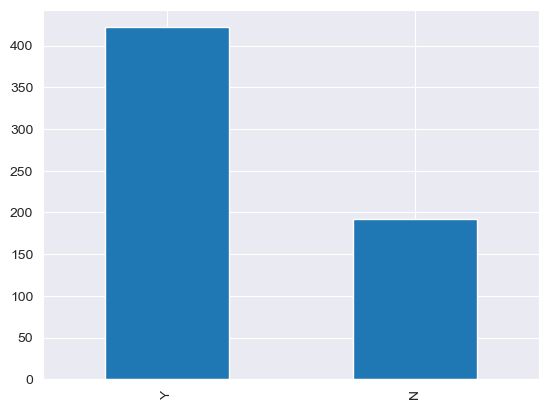

In [90]:
status.plot.bar() #pandas

In [91]:
accepted = data.Loan_Status.value_counts()['Y']/len(data.Loan_Status)*100
accepted
rejected = data.Loan_Status.value_counts()['N']/len(data.Loan_Status)*100
rejected

31.27035830618892

<AxesSubplot: xlabel='LoanAmount', ylabel='Count'>

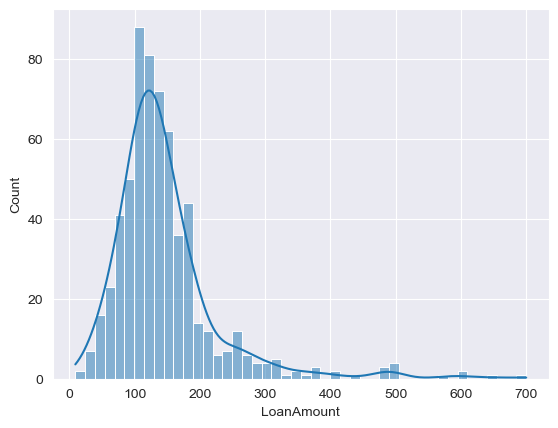

In [92]:
sns.histplot(data=data,x=data.LoanAmount,kde=True)

(array([ 72., 332., 143.,  33.,  15.,   6.,   5.,   3.,   3.,   2.]),
 array([  9. ,  78.1, 147.2, 216.3, 285.4, 354.5, 423.6, 492.7, 561.8,
        630.9, 700. ]),
 <BarContainer object of 10 artists>)

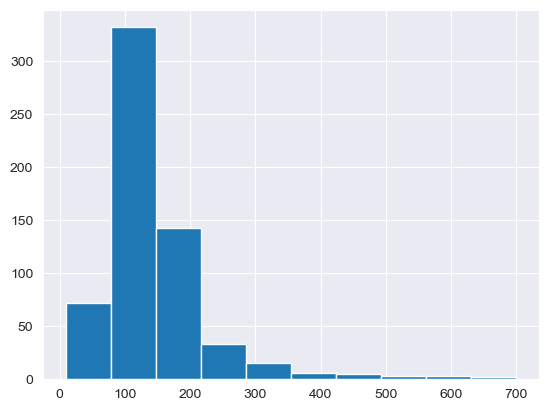

In [93]:
plt.hist(x=data.LoanAmount)

<AxesSubplot: ylabel='LoanAmount'>

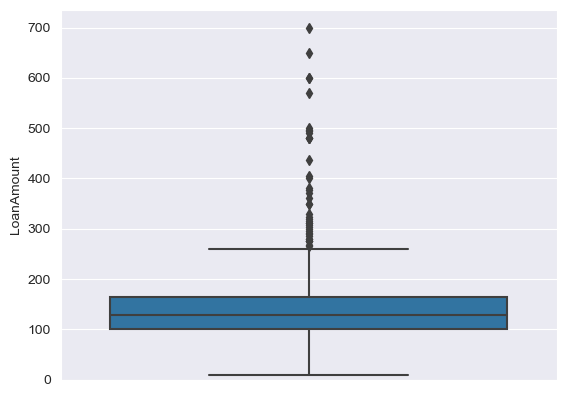

In [94]:
data.LoanAmount.hist()
sns.boxplot(y = data.LoanAmount)

<AxesSubplot: xlabel='LoanAmount', ylabel='Count'>

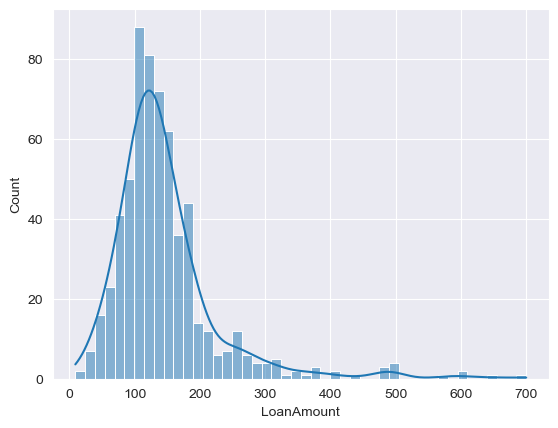

In [95]:
sns.histplot(x = data.LoanAmount,kde=True)

In [98]:
# data.LoanAmount = np.log(data.LoanAmount)
data['SqrtLoanAmount'] = np.sqrt(data.LoanAmount)

<AxesSubplot: xlabel='LoanAmount', ylabel='Count'>

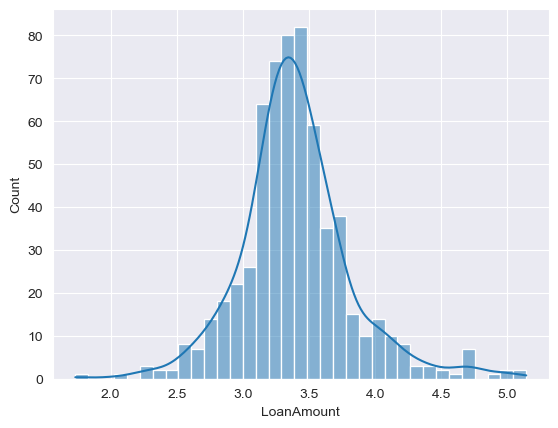

In [102]:
sns.histplot(x=SqrtLoanAmont,kde=True)

In [101]:
data = data.drop(['LoanAmount'],axis=1)
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,SqrtLoanAmount
0,LP001002,Male,No,0,Graduate,No,5849,0.0,360.0,1.0,Urban,Y,12.100089
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,360.0,1.0,Rural,N,11.313708
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,360.0,1.0,Urban,Y,8.124038
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,360.0,1.0,Urban,Y,10.954451
4,LP001008,Male,No,0,Graduate,No,6000,0.0,360.0,1.0,Urban,Y,11.874342
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,360.0,1.0,Rural,Y,8.426150
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,180.0,1.0,Rural,Y,6.324555
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,360.0,1.0,Urban,Y,15.905974
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,360.0,1.0,Urban,Y,13.674794


C:\Users\acer\AppData\Local\Temp\ipykernel_9384\2103976532.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=data.corr(),cmap='coolwarm',vmin=-1,vmax=1,annot=True)


<AxesSubplot: >

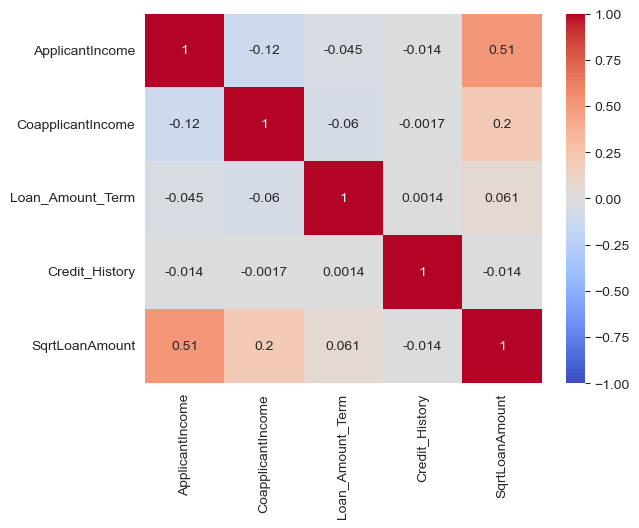

In [103]:
numerical_cols = data.select_dtypes(include=['int64','float64'])
numerical_cols.corr()
sns.heatmap(data=data.corr(),cmap='coolwarm',vmin=-1,vmax=1,annot=True)

In [121]:
categorical_cols = data.select_dtypes(include='object')
# data = data.drop(['Loan_ID'],axis = 1)
# data
categorical_cols
data = pd.get_dummies(data,drop_first=True,prefix_sep='_',columns=categorical_cols.columns)
data

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,SqrtLoanAmount,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,360.0,1.0,12.100089,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,360.0,1.0,11.313708,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,360.0,1.0,8.124038,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,360.0,1.0,10.954451,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,360.0,1.0,11.874342,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,360.0,1.0,8.426150,0,0,0,0,0,0,0,0,0,1
610,4106,0.0,180.0,1.0,6.324555,1,1,0,0,1,0,0,0,0,1
611,8072,240.0,360.0,1.0,15.905974,1,1,1,0,0,0,0,0,1,1
612,7583,0.0,360.0,1.0,13.674794,1,1,0,1,0,0,0,0,1,1


In [132]:
X = data.drop(['Loan_Status_Y'],axis=1)
Y = data['Loan_Status_Y']

<AxesSubplot: xlabel='ApplicantIncome', ylabel='Count'>

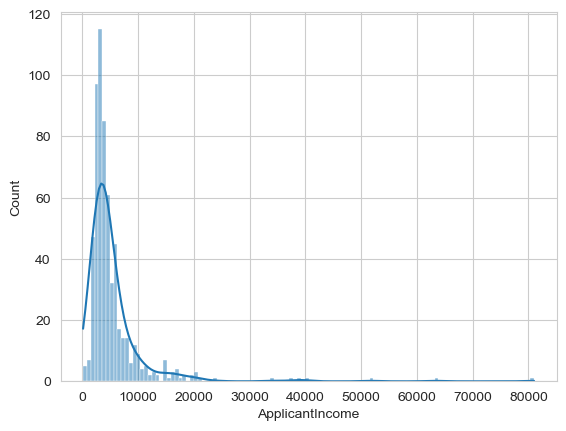

In [128]:
sns.histplot(x= data.ApplicantIncome,kde=True)

In [133]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
X_std = norm.fit_transform(X)

In [137]:
X_std.shape

(614, 14)

In [140]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size= .2)

(123, 14)

In [141]:
x_train

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,SqrtLoanAmount,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
32,4692,0.0,360.0,1.0,10.295630,1,0,1,0,0,0,1,0,0
550,6633,0.0,360.0,0.0,12.100089,1,1,0,1,0,0,1,0,0
103,4652,3583.0,360.0,1.0,12.100089,1,1,0,0,0,0,0,1,0
140,5042,2083.0,360.0,1.0,13.601471,1,1,0,1,0,0,0,0,0
580,6540,0.0,360.0,1.0,14.317821,1,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,3250,0.0,360.0,1.0,13.038405,1,1,0,0,0,0,0,0,0
190,4885,0.0,360.0,1.0,6.928203,1,0,0,0,0,1,0,0,0
232,3189,2598.0,342.0,1.0,10.954451,1,0,0,0,0,1,0,0,0
508,2479,3013.0,360.0,1.0,13.711309,1,1,0,0,0,0,1,0,1


In [143]:
#Model Creating
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model_logistic_regressor = LogisticRegression()
model_logistic_regressor.fit(x_train,y_train)
y_predict = model_logistic_regressor.predict(x_test)
confusion_matrix = metrics.confusion_matrix(y_test,y_predict)
confusion_matrix

C:\Users\acer\Anaconda\anaconda3\envs\newConda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[15, 18],
       [ 3, 87]], dtype=int64)

In [145]:
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.83      0.45      0.59        33
           1       0.83      0.97      0.89        90

    accuracy                           0.83       123
   macro avg       0.83      0.71      0.74       123
weighted avg       0.83      0.83      0.81       123



In [176]:
from sklearn.neighbors import KNeighborsClassifier
model_KNC = KNeighborsClassifier(n_neighbors=1)
model_KNC.fit(x_train,y_train)
y_predict2 = model_KNC.predict(x_test)

In [177]:
confusion_matrix2 = metrics.confusion_matrix(y_test,y_predict2)
confusion_matrix2

array([[ 8, 25],
       [27, 63]], dtype=int64)

In [152]:
print(metrics.classification_report(y_test,y_predict2))

              precision    recall  f1-score   support

           0       0.31      0.27      0.29        33
           1       0.74      0.78      0.76        90

    accuracy                           0.64       123
   macro avg       0.53      0.53      0.53       123
weighted avg       0.63      0.64      0.63       123



In [183]:
#model tunning
from sklearn.model_selection import RandomizedSearchCV
# Define a distribution of hyperparameters to search over
param_dist = {'C': np.logspace(-4, 4, 20), 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}

# Use randomized search to find the best hyperparameters
random_search = RandomizedSearchCV(model_logistic_regressor, param_distributions=param_dist, n_iter=20, cv=5)
random_search.fit(x_train, y_train)

# Print the best hyperparameters and the model's score on the test set
print("Best hyperparameters: ", random_search.best_estimator_.get_params())
print("Test set score: ", random_search.score(x_test, y_test))

C:\Users\acer\Anaconda\anaconda3\envs\newConda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\acer\Anaconda\anaconda3\envs\newConda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\acer\Anaconda\anaconda3\envs\newConda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\acer\Anaconda\anaconda3\envs\newConda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\acer\Anaconda\anaconda3\envs\newConda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best hyperparameters:  {'C': 206.913808111479, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Test set score:  0.8373983739837398


C:\Users\acer\Anaconda\anaconda3\envs\newConda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\acer\Anaconda\anaconda3\envs\newConda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [186]:
# Fine-tuned logistic regression model
from sklearn.linear_model import LogisticRegression
model_logistic_regressor_tuned = LogisticRegression( C = 206.913808111479, class_weight = None, dual =  False, fit_intercept= True, intercept_scaling= 1, l1_ratio= None, max_iter= 100, multi_class= 'auto', n_jobs= None, penalty= 'l2', random_state= None, solver= 'liblinear', tol= 0.0001, verbose= 0, warm_start= False)

model_logistic_regressor_tuned.fit(x_train,y_train)
y_predict_tuned = model_logistic_regressor_tuned.predict(x_test)

In [188]:
confusion_matrix_tuned = metrics.confusion_matrix(y_test,y_predict_tuned)
confusion_matrix_tuned

array([[15, 18],
       [ 2, 88]], dtype=int64)

In [189]:
print(metrics.classification_report(y_test,y_predict_tuned))

              precision    recall  f1-score   support

           0       0.88      0.45      0.60        33
           1       0.83      0.98      0.90        90

    accuracy                           0.84       123
   macro avg       0.86      0.72      0.75       123
weighted avg       0.84      0.84      0.82       123

